In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('Mental_health_responses.csv')

In [5]:
len(df)

1260

In [6]:
len(df.columns)

27

In [8]:
df = df.rename(columns={'Have you sought treatment for a mental health condition?': 'treatment', \
                        'Do you think that discussing a mental health issue with your employer would have negative consequences?': 'mental_health_consequence',\
                       'Do you think that discussing a physical health issue with your employer would have negative consequences?': 'phys_health_consequence'})

In [9]:
df.columns

Index(['Timestamp', 'Age', 'Gender', 'Country',
       'If you live in the United States, which state or territory do you live in?',
       'Are you self-employed?',
       'Do you have a family history of mental illness?', 'treatment',
       'If you have a mental health condition, do you feel that it interferes with your work?',
       'How many employees does your company or organization have?',
       'Do you work remotely (outside of an office) at least 50% of the time?',
       'Is your employer primarily a tech company/organization?',
       'Does your employer provide mental health benefits?',
       'Do you know the options for mental health care your employer provides?',
       'Has your employer ever discussed mental health as part of an employee wellness program?',
       'Does your employer provide resources to learn more about mental health issues and how to seek help?',
       'Is your anonymity protected if you choose to take advantage of mental health or substance abus

In [10]:
df = df[df['Age'] > 0]

In [11]:
df = df[df['Age'] < 100]

In [12]:
len(df)

1255

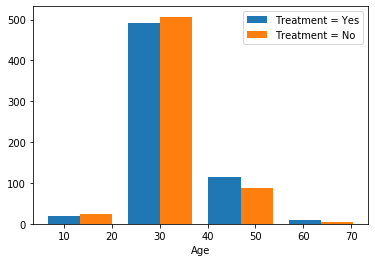

In [91]:
#Step 3:
#1. Treatment and Age
df_treat_y = df[df['treatment'] == 'Yes']
df_treat_n = df[df['treatment'] == 'No']
plt.hist([df_treat_y['Age'], df_treat_n['Age']], bins = 4, label=['Treatment = Yes', 'Treatment = No'])
plt.legend(loc='upper right')
plt.xlabel('Age')
plt.savefig('1.png')

In [92]:
df['Gender'].unique()

array(['Female', 'M', 'Male', 'male', 'female', 'm', 'Male-ish', 'maile',
       'Trans-female', 'Cis Female', 'F', 'something kinda male?',
       'Cis Male', 'Woman', 'f', 'Mal', 'Male (CIS)', 'queer/she/they',
       'non-binary', 'Femake', 'woman', 'Make', 'Nah', 'Enby', 'fluid',
       'Genderqueer', 'Female ', 'Androgyne', 'Agender',
       'cis-female/femme', 'Guy (-ish) ^_^', 'male leaning androgynous',
       'Male ', 'Man', 'Trans woman', 'msle', 'Neuter', 'Female (trans)',
       'queer', 'Female (cis)', 'Mail', 'cis male', 'A little about you',
       'Malr', 'femail', 'Cis Man',
       'ostensibly male, unsure what that really means'], dtype=object)

In [99]:
#2. Treatment and Gender
#make mapping
dict_gender = {}
dict_gender['Female'] = 0
dict_gender['msle'] = 1
dict_gender['Neuter'] = 17
dict_gender['Female (trans)'] = 3
dict_gender['M'] = 1
dict_gender['queer'] = 12
dict_gender['Female (cis)'] = 4
dict_gender['Mail'] = 1
dict_gender['Male'] = 1
dict_gender['cis male'] = 6
dict_gender['A little about you'] = 18
dict_gender['male'] = 1
dict_gender['Malr'] = 1
dict_gender['femail'] = 0
dict_gender['Cis Man'] = 6
dict_gender['female'] = 0
dict_gender['ostensibly male, unsure what that really means'] = 19
dict_gender['m'] = 1
dict_gender['Male-ish'] = 2
dict_gender['maile'] = 1
dict_gender['Trans-female'] = 3
dict_gender['Cis Female'] = 4
dict_gender['F'] = 0
dict_gender['something kinda male?'] = 5
dict_gender['Cis Male'] = 6
dict_gender['Woman'] = 0
dict_gender['f'] = 0
dict_gender['Mal'] = 1
dict_gender['Male (CIS)'] = 6
dict_gender['queer/she/they'] = 7
dict_gender['non-binary'] = 8
dict_gender['Femake'] = 0
dict_gender['woman'] = 0
dict_gender['Make'] = 1
dict_gender['Nah'] = 9
dict_gender['Enby'] = 10
dict_gender['fluid'] = 11
dict_gender['Genderqueer'] = 12
dict_gender['Androgyne'] = 13
dict_gender['Agender'] = 14
dict_gender['cis-female/femme'] = 4
dict_gender['Guy (-ish) ^_^'] = 15
dict_gender['male leaning androgynous'] = 16
dict_gender['Male '] = 1
dict_gender['Man'] = 1
dict_gender['Trans woman'] = 3
dict_gender['Female '] = 0

In [109]:
len(dict_gender)

47

In [100]:
#add column to df
df['Gender_Num'] = df.apply (lambda row: dict_gender[row.Gender], axis=1)

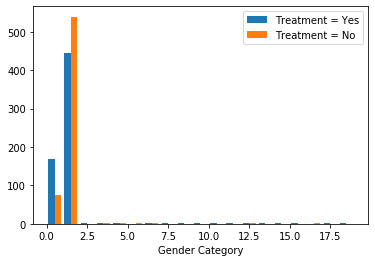

In [130]:
#plot
df_gender_treat_y = df[df['treatment'] == 'Yes']
df_gender_treat_n = df[df['treatment'] == 'No']
plt.hist([df_gender_treat_y['Gender_Num'], df_gender_treat_n['Gender_Num']], 
         bins = 19, label=['Treatment = Yes', 'Treatment = No'])
plt.legend()
plt.xlabel('Gender Category')
plt.savefig('2_new.png')

In [21]:
df['Country'].unique()

array(['United States', 'Canada', 'United Kingdom', 'Bulgaria', 'France',
       'Portugal', 'Netherlands', 'Switzerland', 'Poland', 'Australia',
       'Germany', 'Russia', 'Mexico', 'Brazil', 'Slovenia', 'Costa Rica',
       'Austria', 'Ireland', 'India', 'South Africa', 'Italy', 'Sweden',
       'Colombia', 'Latvia', 'Romania', 'Belgium', 'New Zealand', 'Spain',
       'Finland', 'Uruguay', 'Israel', 'Bosnia and Herzegovina',
       'Hungary', 'Singapore', 'Japan', 'Nigeria', 'Croatia', 'Norway',
       'Thailand', 'Denmark', 'Bahamas, The', 'Greece', 'Moldova',
       'Georgia', 'China', 'Czech Republic', 'Philippines'], dtype=object)

In [115]:
#3. Treatment and Country
#make mapping
dict_country = {}
dict_country['United States'] = 0
dict_country['Canada'] = 1
dict_country['United Kingdom'] = 1
dict_country['Bulgaria'] = 1
dict_country['France'] = 1
dict_country['Portugal'] = 1
dict_country['Netherlands'] = 1
dict_country['Switzerland'] = 1
dict_country['Poland'] = 1
dict_country['Australia'] = 2
dict_country['Germany'] = 1
dict_country['Russia'] = 1
dict_country['Mexico'] = 0
dict_country['Brazil'] = 3
dict_country['Slovenia'] = 1
dict_country['Costa Rica'] = 0
dict_country['Austria'] = 1
dict_country['Ireland'] = 1
dict_country['India'] = 4
dict_country['South Africa'] = 5
dict_country['Italy'] = 1
dict_country['Sweden'] = 1
dict_country['Colombia'] = 3
dict_country['Latvia'] = 1
dict_country['Romania'] = 1
dict_country['Belgium'] = 1
dict_country['New Zealand'] = 2
dict_country['Spain'] = 1
dict_country['Finland'] = 1
dict_country['Uruguay'] = 3
dict_country['Israel'] = 4
dict_country['Bosnia and Herzegovina'] = 1
dict_country['Hungary'] = 1
dict_country['Singapore'] = 4
dict_country['Japan'] = 4
dict_country['Nigeria'] = 5
dict_country['Croatia'] = 1
dict_country['Norway'] = 1
dict_country['Thailand'] = 4
dict_country['Denmark'] = 1
dict_country['Bahamas, The'] = 0
dict_country['Greece'] = 1
dict_country['Moldova'] = 1
dict_country['Georgia'] = 1
dict_country['China'] = 4
dict_country['Czech Republic'] = 1
dict_country['Philippines'] = 4

In [116]:
#add column to df
df['Country_Num'] = df.apply (lambda row: dict_country[row.Country], axis=1)

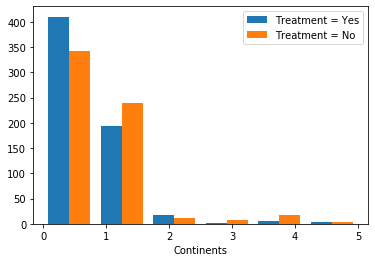

In [131]:
#plot
df_treat_y = df[df['treatment'] == 'Yes']
df_treat_n = df[df['treatment'] == 'No']
plt.hist([df_treat_y['Country_Num'], df_treat_n['Country_Num']], 
         bins = 6, label=['Treatment = Yes', 'Treatment = No'])
plt.legend()
plt.xlabel('Continents')
plt.savefig('3_new.png')

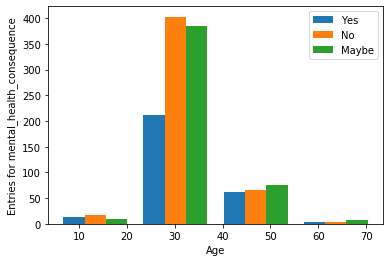

In [123]:
#4. Mental_Health_Consequence and Age
df_mhc_y = df[df['mental_health_consequence'] == 'Yes']
df_mhc_n = df[df['mental_health_consequence'] == 'No']
df_mhc_m = df[df['mental_health_consequence'] == 'Maybe']
plt.hist([df_mhc_y['Age'], df_mhc_n['Age'],df_mhc_m['Age']], bins = 4, \
         label=['Yes', 'No', 'Maybe'])
plt.legend(loc='upper right')
plt.xlabel('Age')
plt.ylabel('Entries for mental_health_consequence')
plt.savefig('4_new.png')

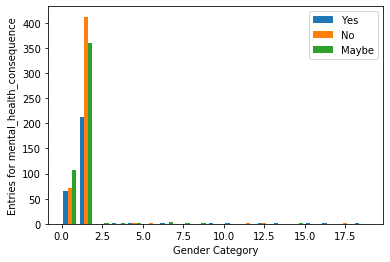

In [125]:
#5 Mental health consequence and Gender
plt.hist([df_mhc_y['Gender_Num'], df_mhc_n['Gender_Num'], df_mhc_m['Gender_Num']], 
         bins = 19, label=['Yes', 'No', 'Maybe'])
plt.legend()
plt.xlabel('Gender Category')
plt.ylabel('Entries for mental_health_consequence')
plt.savefig('5.png')

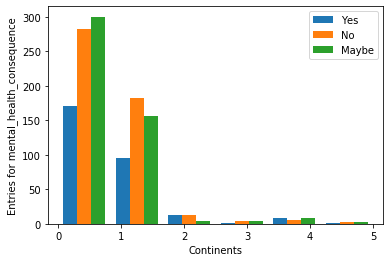

In [126]:
#6 mental health consequence and Country
plt.hist([df_mhc_y['Country_Num'], df_mhc_n['Country_Num'], df_mhc_m['Country_Num']], 
         bins = 6, label=['Yes', 'No', 'Maybe'])
plt.legend()
plt.xlabel('Continents')
plt.ylabel('Entries for mental_health_consequence')
plt.savefig('6.png')

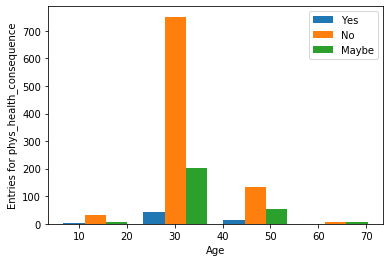

In [127]:
#7 physical health consequence and Age
df_phc_y = df[df['phys_health_consequence'] == 'Yes']
df_phc_n = df[df['phys_health_consequence'] == 'No']
df_phc_m = df[df['phys_health_consequence'] == 'Maybe']
plt.hist([df_phc_y['Age'], df_phc_n['Age'],df_phc_m['Age']], bins = 4, \
         label=['Yes', 'No', 'Maybe'])
plt.legend(loc='upper right')
plt.xlabel('Age')
plt.ylabel('Entries for phys_health_consequence')
plt.savefig('7.png')

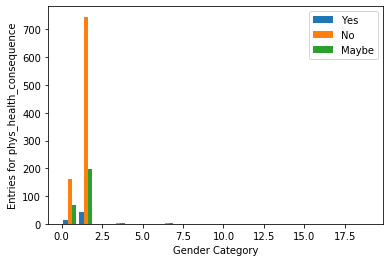

In [128]:
#8 physical health consequence and Gender
plt.hist([df_phc_y['Gender_Num'], df_phc_n['Gender_Num'], df_phc_m['Gender_Num']], 
         bins = 19, label=['Yes', 'No', 'Maybe'])
plt.legend()
plt.xlabel('Gender Category')
plt.ylabel('Entries for phys_health_consequence')
plt.savefig('8.png')

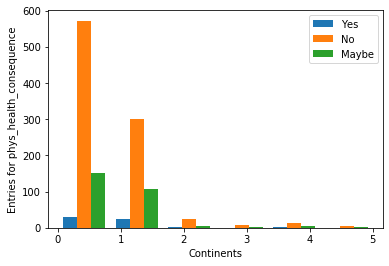

In [129]:
#9 physical health consequence and Country
plt.hist([df_phc_y['Country_Num'], df_phc_n['Country_Num'], df_phc_m['Country_Num']], 
         bins = 6, label=['Yes', 'No', 'Maybe'])
plt.legend()
plt.xlabel('Continents')
plt.ylabel('Entries for phys_health_consequence')
plt.savefig('9.png')

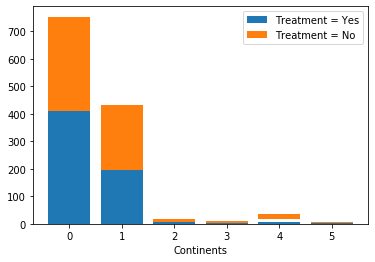

In [152]:
#Step 4:
#Bias Hypothesis
#Seeking treatment dependent on country
# plt.hist([df_treat_y['Country_Num'], df_treat_n['Country_Num']], 
#          bins = 6, label=['Treatment = Yes', 'Treatment = No'])
# plt.legend()
# plt.xlabel('Continents')
p1 = plt.bar(df_treat_y['Country_Num'].value_counts().index,df_treat_y['Country_Num'].value_counts().values,\
            label = 'Treatment = Yes')
p2 = plt.bar(df_treat_n['Country_Num'].value_counts().index,df_treat_n['Country_Num'].value_counts().values,\
            bottom = df_treat_y['Country_Num'].value_counts().values, label = 'Treatment = No')
plt.xlabel('Continents')
plt.legend()
plt.savefig('10.png')

# plt.title('Scores by group and gender')
# plt.legend((p1[0], p2[0]), ('Men', 'Women'))

In [144]:
#Fair hypothesis
#Seeking treatment not dependent on Country
df_treat_y['Country_Num'].value_counts().values

array([410, 194,  18,   5,   4,   2])

In [135]:
df_treat_n['Country_Num'].value_counts()

0    343
1    239
4     18
2     12
3      7
5      3
Name: Country_Num, dtype: int64

In [158]:
a = abs(df_treat_y['Country_Num'].value_counts() - df_treat_n['Country_Num'].value_counts())/(df_treat_y['Country_Num'].value_counts() + df_treat_n['Country_Num'].value_counts())

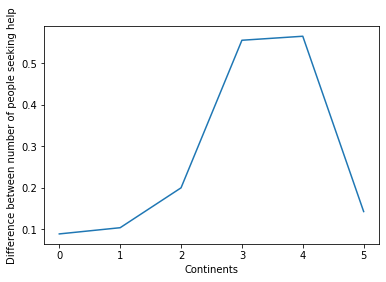

In [159]:
a
plt.plot(a.index,a.values)
plt.xlabel('Continents')
plt.ylabel('Difference between number of people seeking help')
plt.savefig('11.png')

In [160]:
#Step 5
df['Country_Num'].mean()

0.5155378486055777

In [162]:
df['Country_Num'].median()

0.0

In [163]:
df['Country_Num'].mode()

0    0
dtype: int64

In [164]:
df_half = df.sample(n=int(len(df)/2), random_state=1)

In [165]:
df_half['Country_Num'].mean()

0.5454545454545454

In [166]:
df_half['Country_Num'].median()

0.0

In [167]:
df_half['Country_Num'].mode()

0    0
dtype: int64

In [168]:
df['Country_Num'].mean() - df_half['Country_Num'].mean()

-0.029916696848967694

In [169]:
df['Country_Num'].median() - df_half['Country_Num'].median()

0.0

In [170]:
df['Country_Num'].mode() - df_half['Country_Num'].mode()

0    0
dtype: int64

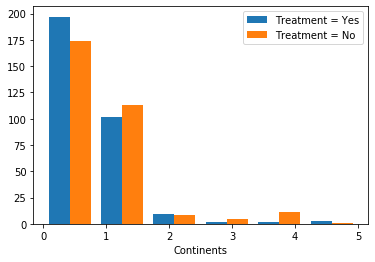

In [172]:
#Step6
df_half_treat_y = df_half[df_half['treatment'] == 'Yes']
df_half_treat_n = df_half[df_half['treatment'] == 'No']
plt.hist([df_half_treat_y['Country_Num'], df_half_treat_n['Country_Num']], 
         bins = 6, label=['Treatment = Yes', 'Treatment = No'])
plt.legend()
plt.xlabel('Continents')
plt.savefig('12.png')

(array([  2.,  94., 182.,  34.]),
 array([ 5. , 16.5, 28. , 39.5, 51. ]),
 <a list of 4 Patch objects>)

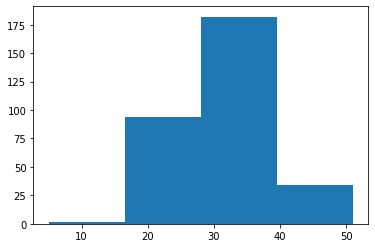

In [80]:
df_half_age_treat_n = df_half[df_half['treatment'] == 'No']
plt.hist(df_half_age_treat_n['Age'], bins=4)